# Real Estate Price Prediction Using Machine Learning

## Executive Summary
Accurately estimating house prices is a criticalaspect of the real estate industry. Understanding what drives property calue helps inform pricing startegies, investment decisions and negotiations. This project leverages machine learning techniques to predict residential house prices. The goal is to build a predictive model that captures market patterns and outputs realistic, data driven price estimates.

### Problem Statement

Accurately estimating the price of residential properties is a key challenge in the real estate market. Buyers want fair deals, sellers want competitive pricing, and investors deek undervalued opportunities. This project aims to build a machine learning model that predicts house prices based on key property features such as size, location, condition and amenities.

Using the "House Price Prediction" dataset from Kaggle, the goal is to develop and evaluate regression models that can learn from historical housing data and provide reliable price estimates for new, unseen properties.

### Objectives
1. To support real estate agents and property developers in pricing homes more accurately, reducing the risk of overpricing or undervaluing properties.

2. To help home buyers and sellers make informed decisions by providing data-driven estimates of property values based on key housing features and market factors.

3. To uncover and analyze the key drivers of property value such as location, square footage, number of bedrooms/bathrooms, and neighborhood conditions.

4. To reduce manual valuation time and subjectivity by offering an automated prediction system that complements or enhances traditional property appraisal methods.

5. To identify pricing trends and anomalies within a local housing market, assisting stakeholders in spotting investment opportunities or areas of concern.

6. To simulate the impact of property improvements (e.g., renovations or additional rooms) on house value, guiding property owners on which upgrades yield the highest return.

7. To build a predictive tool that can be used by real estate platforms to enhance customer experience by offering instant price estimates on property listings.



### This project will involve:
    A[Data Loading] --> B[Data Cleaning and Preprocessing]
    B --> C[Exploratory Data Analysis(EDA)]]
    C --> D[Feature engineering]
    D --> E[Model Training and Evaluation]
    E --> F[Conclusions & Recommendations]

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
import joblib


### 1. Loading and inspecting the data

In [3]:
#Load the dataset in Python using pandas and inspect the first few rows

df=pd.read_csv("Data/HousingData.csv")
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


This dataset contains detailed information on residential properties, including their physical attributes, location and sale prices. Key attributes in the dataset include:
- `Price`: The target variable representing the sale price of the house.

- `Bedrooms` & `Bathrooms`: Number of bedrooms and bathrooms in the property.

- `Living Area` & `Lot Size`: Square footage of the interior living space and the overall lot.

- `Floors`: Number of floors in the house.

- `Waterfront`, `View`, and `Condition`: Qualitative indicators of whether the house has a waterfront view, general view quality, and condition rating.

- `Year Built` & `Year Renovated`: Construction year and the year of last major renovation (if any).

- `Location Information`: Street address, city, state, and ZIP code.

In [4]:
# Checking the shape of the dataset (rows, columns)

df.shape

(4600, 18)

In [5]:
# Checking dataset structure and column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The output shows the count of non-null entries, data types, and memory usage, which helps in spotting missing values and identifying opportunities for type conversion.

Based on the above, it will be necessary to change the data type of date from `object` type and convert it to `datetime` using `pd.to_datetime()`

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print(df[['date', 'year', 'month']].dtypes)


date     datetime64[ns]
year              int32
month             int32
dtype: object


Converting selected columns to the `category` data type to optimize memory usage and prepare for encoding.

In [7]:
categorical_cols = ['city', 'statezip', 'country']
for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols


['city', 'statezip', 'country']

In [8]:
print(df.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                   category
statezip               category
country                category
year                      int32
month                     int32
dtype: object


In [9]:
# Checking for missing values
print(df.isnull().sum())


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
month            0
dtype: int64


In [10]:
#Converting bedrooms and price to integers

cols_to_int = ['bedrooms', 'price']

for col in cols_to_int:
    df[col] = df[col].astype(int)


In [11]:
# Handle outliers using IQR
numeric_cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)            # 25th percentile
    Q3 = df[col].quantile(0.75)            # 75th percentile
    IQR = Q3 - Q1                          # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR           # Lower outlier threshold
    upper_bound = Q3 + 1.5 * IQR           # Upper outlier threshold
    
    # This replaces outliers with the nearest acceptable value
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [12]:
numeric_cols

['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

### Dropping Irrelevant Columns

The `date` column has already been used to extract useful features such as `year` and `month`, making it redundant in its original form. The `street` column is high-cardinality and unlikely to provide predictive value to the model. Therefore, we drop both columns to clean the dataset and reduce noise.


In [13]:
cols_to_drop = ['date', 'street']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [14]:
#Confirming date and street were dropped
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip', 'country', 'year',
       'month'],
      dtype='object')


### Encoding Categorical Variables

Machine learning models require numerical input, so categorical variables must be converted into a numerical format. In this case, we use **one-hot encoding** to transform columns like `city`, `statezip`, and `country` into binary indicator variables. We use `drop_first=True` to avoid the dummy variable trap, which helps prevent multicollinearity in models like linear or logistic regression.


In [15]:
# Reduce cardinality by keeping only top N categories
top_n = 10

top_cities = df['city'].value_counts().nlargest(top_n).index
df['city'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

top_zips = df['statezip'].value_counts().nlargest(top_n).index
df['statezip'] = df['statezip'].apply(lambda x: x if x in top_zips else 'Other')

In [16]:
categorical_cols = ['city', 'statezip', 'country']

# Create a new DataFrame with one-hot encoded categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})

# Preview the encoded DataFrame
print(df_encoded.head())


        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...                  0                  0   

   statezip_WA 98042  statezip_WA 98052  statezip_

In [17]:
df_encoded.describe().T  # Transposed for easier viewing


,count,mean,std,min,25%,50%,75%,max
price,4600.0,516993.292391,261471.572219,0.000,322875.00,460943.00,654962.50,1153093.750
bedrooms,4600.0,3.392609,0.856964,1.500,3.00,3.00,4.00,5.500
bathrooms,4600.0,2.139158,0.720548,0.625,1.75,2.25,2.50,3.625
sqft_living,4600.0,2114.626739,867.106902,370.000,1460.00,1980.00,2620.00,4360.000
sqft_lot,4600.0,8934.793261,5388.102126,638.000,5000.75,7683.00,11001.25,20002.000
floors,4600.0,1.512065,0.538288,1.000,1.00,1.50,2.00,3.500
waterfront,4600.0,0.007174,0.084404,0.000,0.00,0.00,0.00,1.000
view,4600.0,0.240652,0.778405,0.000,0.00,0.00,0.00,4.000
condition,4600.0,3.451739,0.677230,1.000,3.00,3.00,4.00,5.000
sqft_above,4600.0,1827.265435,862.168977,370.000,1190.00,1590.00,2300.00,9410.000


In [18]:
df_encoded[df_encoded['price'] == 0]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
4354,0.0,3.0,1.750,1490,10125,1.0,0,0,4,1490,...,0,0,0,0,0,0,0,0,0,0
4356,0.0,4.0,2.750,2600,5390,1.0,0,0,4,1300,...,0,0,0,0,0,0,0,0,0,0
4357,0.0,5.5,2.750,3200,9200,1.0,0,2,4,1600,...,0,0,0,0,0,0,0,0,0,0
4358,0.0,5.0,3.500,3480,20002,2.0,0,0,4,2490,...,0,0,0,0,0,0,0,0,0,0
4361,0.0,5.0,1.500,1500,7112,1.0,0,0,5,760,...,0,0,0,0,0,0,0,0,0,0
4362,0.0,4.0,3.625,3680,18804,2.0,0,0,3,3680,...,0,0,0,0,0,0,1,0,0,0
4374,0.0,2.0,2.500,2200,20002,1.0,0,3,3,2200,...,0,0,0,0,0,0,0,0,0,0
4376,0.0,4.0,2.250,2170,10500,1.0,0,2,4,1270,...,0,0,0,0,0,0,0,0,0,0
4382,0.0,5.0,3.625,4360,6324,2.0,0,0,3,3210,...,0,0,0,0,0,0,0,0,0,0
4383,0.0,5.0,3.625,4360,9000,2.0,0,0,3,4430,...,0,0,0,0,0,0,0,0,0,0


In [19]:
(df_encoded['price'] == 0).sum()


49

#### Dropping Invalid Price Entries

Some rows in the dataset had a house price of 0, which is not realistic for a housing market. These entries likely represent missing or incorrect data. Since they make up just over 1% of the dataset, they are safely removed to avoid negatively impacting model training.


In [20]:
#Removing columns with a house price of 0
df_encoded = df_encoded[df_encoded['price'] != 0]

print(df_encoded.shape)


(4551, 35)


In [21]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,522559.689079,257282.400079,7800.000,326264.00,465000.00,657500.0,1153093.750
bedrooms,4551.0,3.386399,0.852697,1.500,3.00,3.00,4.0,5.500
bathrooms,4551.0,2.134970,0.717214,0.625,1.75,2.25,2.5,3.625
sqft_living,4551.0,2108.644913,862.904002,370.000,1460.00,1970.00,2610.0,4360.000
sqft_lot,4551.0,8913.638761,5385.045286,638.000,5000.00,7680.00,10978.0,20002.000
floors,4551.0,1.512195,0.538531,1.000,1.00,1.50,2.0,3.500
waterfront,4551.0,0.006592,0.080932,0.000,0.00,0.00,0.0,1.000
view,4551.0,0.234674,0.765373,0.000,0.00,0.00,0.0,4.000
condition,4551.0,3.449352,0.675160,1.000,3.00,3.00,4.0,5.000
sqft_above,4551.0,1822.221710,854.452888,370.000,1190.00,1590.00,2300.0,9410.000


### Frequency Summary of One-Hot Encoded Binary Columns

To better understand the distribution of categories after one-hot encoding, we calculate the proportion of 1s (i.e., presence of each category) for all binary columns. This helps identify rare or dominant categories that may impact model performance.


In [22]:
binary_cols = [col for col in df_encoded.columns 
               if df_encoded[col].nunique() == 2 and 
               set(df_encoded[col].unique()).issubset({0, 1})]


In [23]:
print("\nSummary Statistics for Binary Columns (Proportion of 1s):") 
binary_summary = df_encoded[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)



Summary Statistics for Binary Columns (Proportion of 1s):
city_Seattle         0.343002
city_Other           0.249396
city_Renton          0.063942
city_Bellevue        0.061745
city_Redmond         0.051637
city_Kirkland        0.041090
city_Issaquah        0.040870
city_Kent            0.040431
city_Sammamish       0.037574
statezip_WA 98103    0.032520
city_Federal Way     0.031861
statezip_WA 98052    0.029664
statezip_WA 98117    0.029005
statezip_WA 98115    0.028345
statezip_WA 98006    0.023951
statezip_WA 98059    0.023292
statezip_WA 98034    0.021753
statezip_WA 98042    0.021534
statezip_WA 98053    0.021534
statezip_WA 98074    0.020655
waterfront           0.006592
dtype: float64


### Binary Feature Distribution

After one-hot encoding categorical variables, we calculated the proportion of 1s for each binary column. This reveals how frequently each category appears in the dataset.

- The most common city is Seattle, representing over 34% of listings.
- Several cities and zip codes occur in less than 0.1% of the data, which may be considered rare and could potentially be dropped or grouped in future steps.


In [24]:
# Save the cleaned and encoded data
df_encoded.to_csv('Data/cleaned_housing_data.csv', index=False)

# Confirmation prints
print("Encoded and cleaned data saved to 'cleaned_housing_data.csv'")
print(f"Data shape: {df_encoded.shape}")
print(df_encoded.head())



Encoded and cleaned data saved to 'cleaned_housing_data.csv'
Data shape: (4551, 35)
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...         

## 2. Exploratory Data Analysis



In [25]:
# Load the cleaned dataset
df_encoded= pd.read_csv('Data/cleaned_housing_data.csv')
df_encoded

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
0,313000.00,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,1153093.75,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,1,0,0,0,0,0,0,0
3,420000.00,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,308166.00,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4547,534333.00,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4548,416904.00,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,1,0,0,0,0
4549,203400.00,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Summary statistics
print("EDA Summary Statistics:")
df_encoded.describe(include='all')

EDA Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,...,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.225597e+05,3.386399,2.134970,2108.644913,8913.638761,1.512195,0.006592,0.234674,3.449352,1822.221710,...,0.023951,0.021753,0.021534,0.029664,0.021534,0.023292,0.020655,0.032520,0.028345,0.029005
std,2.572824e+05,0.852697,0.717214,862.904002,5385.045286,0.538531,0.080932,0.765373,0.675160,854.452888,...,0.152913,0.145894,0.145171,0.169677,0.145171,0.150845,0.142241,0.177397,0.165976,0.167838
min,7.800000e+03,1.500000,0.625000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.262640e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7680.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,10978.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.153094e+06,5.500000,3.625000,4360.000000,20002.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Select numerical columns only (excluding dummy/binary columns)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()


#### Distribution of Key Numerical Features

This grid of histograms shows the distribution of the first 9 numerical features in the dataset. This will help us understand the spread, central tendency, and skewness of each feature before modeling.  
- **What to look for:**  
  - Features with strong skew (which may need transformation)
  - Features with narrow ranges or outliers
  - Normal or multimodal distributions

The KDE (Kernel Density Estimate) curves overlaid on each histogram help us visually assess the shape of each distribution.

---


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moring

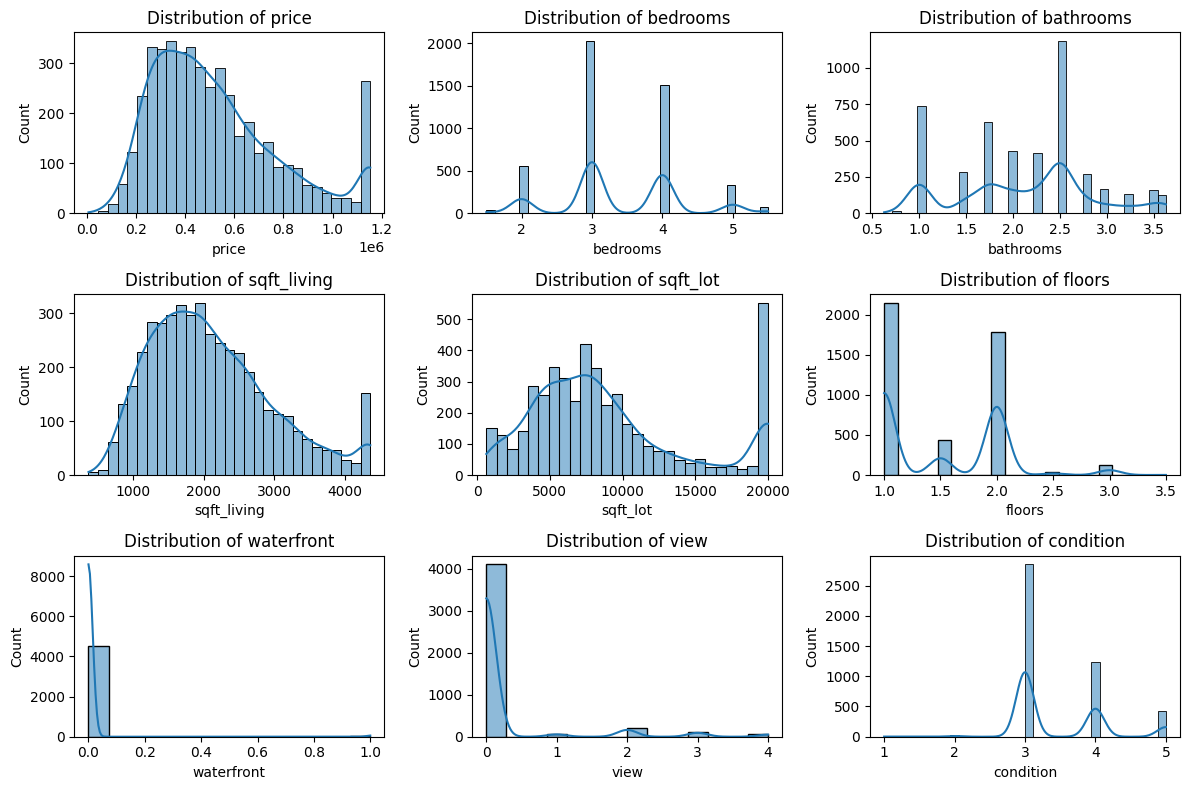

In [28]:
#Visualize Distribution of Key Numerical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:9], 1):  # limit to 9 columns
    plt.subplot(3, 3, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()



#### Boxplot of House Prices

This boxplot provides a visual summary of the distribution of house prices, highlighting potential **outliers** — unusually high or low values compared to the rest of the data. 

- The box represents the **interquartile range (IQR)**, which contains the middle 50% of the data.
- The line inside the box is the **median**.
- Points outside the "whiskers" are considered **potential outliers**.

This helps identify anomalies that might skew analysis or require further investigation.


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


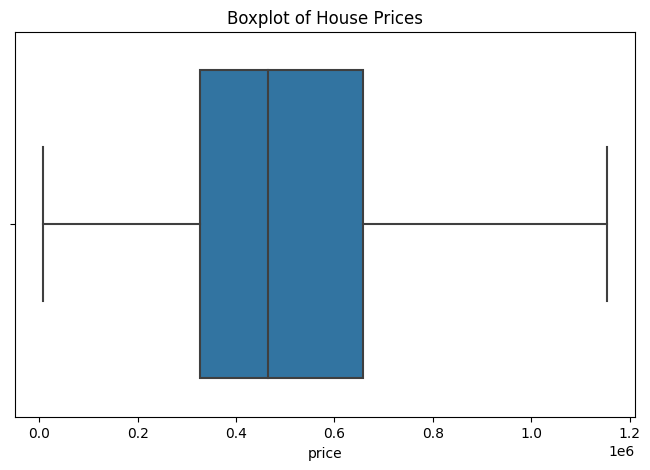

In [29]:
#Boxplots (to spot outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded['price'])
plt.title('Boxplot of House Prices')
plt.show()


#### Price vs. Number of Bedrooms

This boxplot shows the distribution of **house prices** across different **numbers of bedrooms**.

- **Whiskers** extend to show the range of most data points, while **dots** outside are potential **outliers**.

This visualization helps identify how the number of bedrooms affects price trends and spot any unusual price patterns for specific bedroom counts.


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


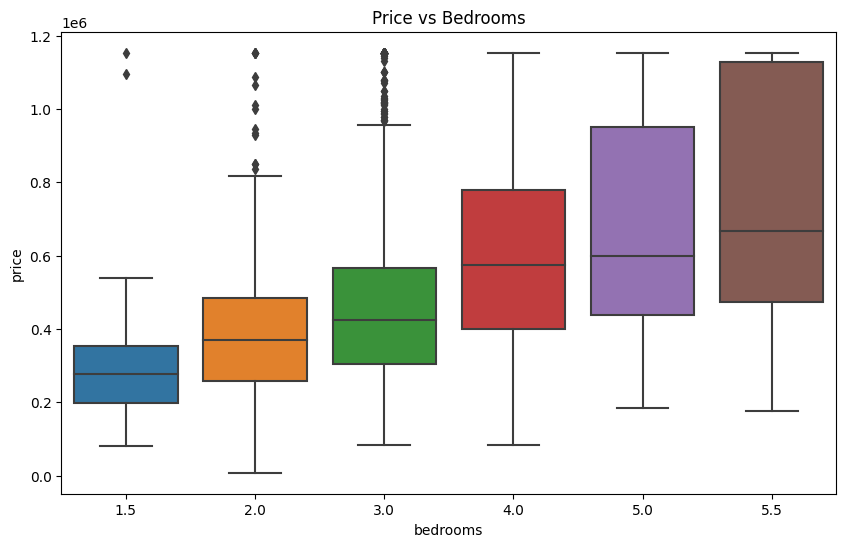

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_encoded)
plt.title('Price vs Bedrooms')
plt.show()


#### Correlation Heatmap (Excluding City and ZIP Code)

To make the correlation heatmap more readable, **city** and **state ZIP code** one-hot encoded columns were excluded:

- These columns often have many categories and can clutter the heatmap.
- The remaining columns are used to compute pairwise **correlation coefficients**.

The heatmap visualizes these correlations:

- **Red** areas indicate strong positive correlations.
- **Blue** areas show strong negative correlations.
- Values near **0** indicate weak or no correlation.

This helps identify relationships between numerical features in the dataset, such as how certain variables may influence house prices.


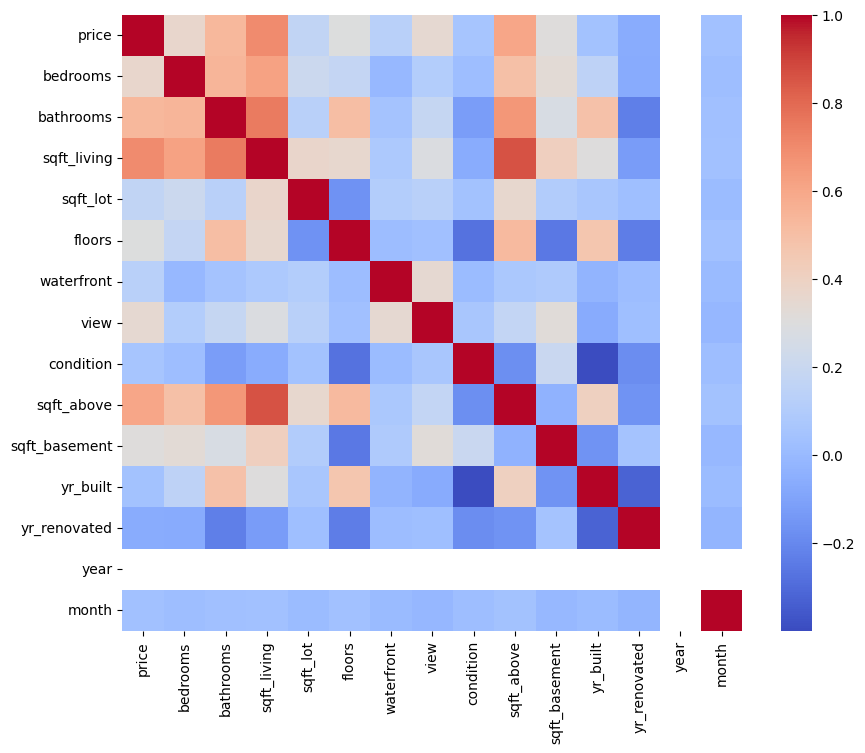

In [32]:
# Exclude city and statezip columns for a more legible heatmap
cols_to_exclude = [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('statezip_')]
 
# Select columns excluding those
heatmap_cols = df_encoded.drop(columns=cols_to_exclude)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_cols.corr(), cmap='coolwarm', annot=False)
plt.show()



#### Top 10 Features Most Correlated with Price

This bar plot shows the top 10 numerical features that have the strongest absolute correlation with `price`. This will help identify which features are most linearly associated with the target variable.  
- **What to look for:**  
  - Features with high positive or negative correlation (closer to ±1)
  - Which features might be the strongest predictors in your regression model
  - Potential for multicollinearity if several features are closely related to each other

This step helps prioritize which variables to explore or engineer further for model building.

---


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


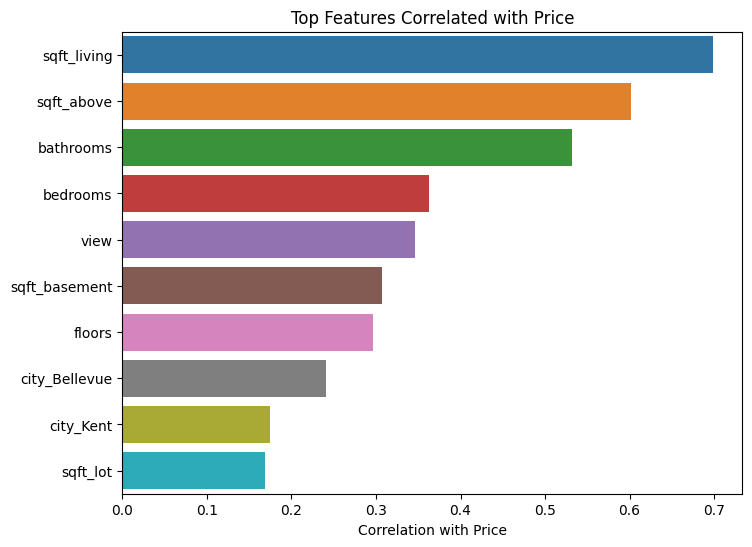

In [33]:
top_corr = corr['price'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Features Correlated with Price')
plt.xlabel('Correlation with Price')
plt.show()


#### Scatter Plot: Price vs. Square Footage of Living Area

This scatter plot visualizes the relationship between the size of the living area (`sqft_living`) and the house price. This will help to observe how living space affects pricing, and to spot any patterns, clusters, or outliers.  
- **What to look for:**  
  - A general upward trend suggests larger homes tend to have higher prices  
  - Outliers (e.g., extremely large homes with low prices, or vice versa)  
  - Non-linear patterns or heteroscedasticity (widening spread as square footage increases)

This helps determine if transformations (e.g., log) or feature scaling might be useful later in modeling.



c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


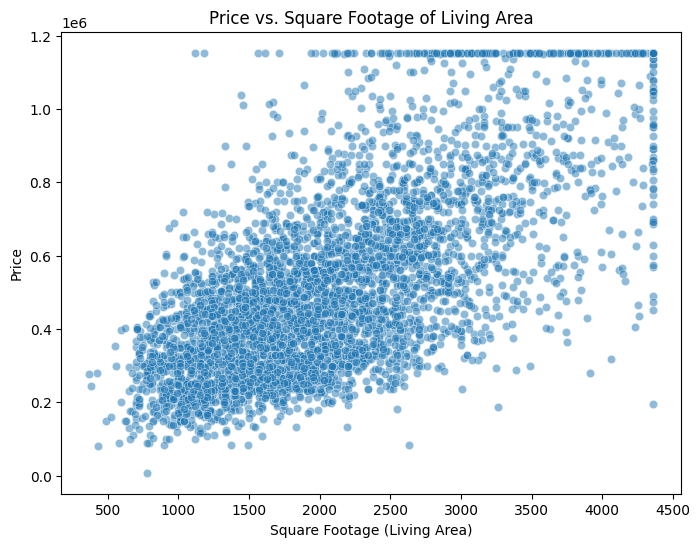

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('Price')
plt.show()


#### Scatter Plot: Price vs. Bedrooms

This scatter plot shows the relationship between the **number of bedrooms** and **house price**.

- Each point represents a house.
- The **x-axis** shows the number of bedrooms.
- The **y-axis** shows the corresponding house price.
- The `alpha=0.5` setting adds transparency to help visualize overlapping points.

This plot helps detect patterns or clusters, such as whether more bedrooms are generally associated with higher prices, or if there are outliers breaking that trend.


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


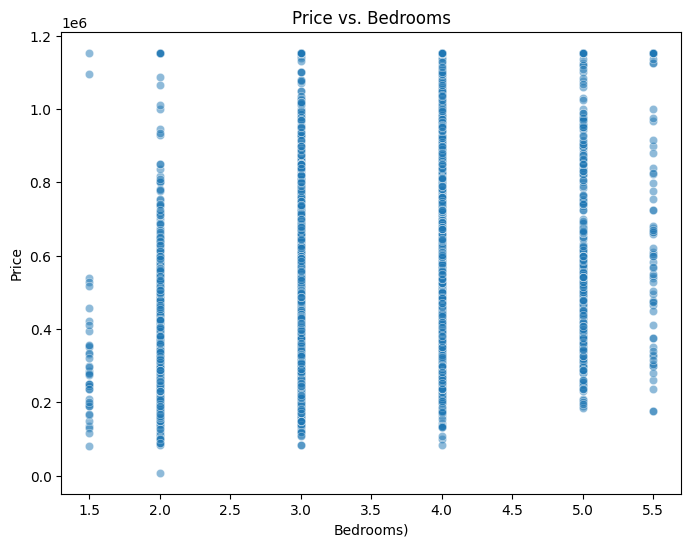

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='bedrooms', y='price', alpha=0.5)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms)')
plt.ylabel('Price')
plt.show()


## 3. Modelling

### Train-Test Split and Feature Scaling

Before training any models, it's important to split the dataset into training and testing sets. This ensures that the model is evaluated on unseen data, giving a realistic measure of its performance.

Feature scaling is applied **after splitting the data** to prevent data leakage. We scale only the training data using `StandardScaler` and apply the same transformation to the test data. This step is essential for models that are sensitive to the scale of input features (e.g., linear regression, logistic regression, SVM, KNN).


In [36]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Scale numerical columns
numerical_cols_to_scale = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                           'bathrooms', 'bedrooms', 'floors', 'year', 'month']

scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

### Baseline Model: Linear Regression

To begin modeling, we train a simple Linear Regression model as our baseline. This model assumes a linear relationship between the features and the target variable (`price`).

While it may not capture complex patterns, it allows us to:
- Evaluate how well linear features explain price
- Benchmark performance against more advanced models later
- Visualize prediction accuracy

We'll use common regression metrics such as R², MAE, MSE, and RMSE to evaluate the model's performance.


In [38]:
# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Linear Regression Performance:
R² Score: 0.6603
MAE: $203,835.78
MSE: $66,042,484,401.71
RMSE: $149,914.45


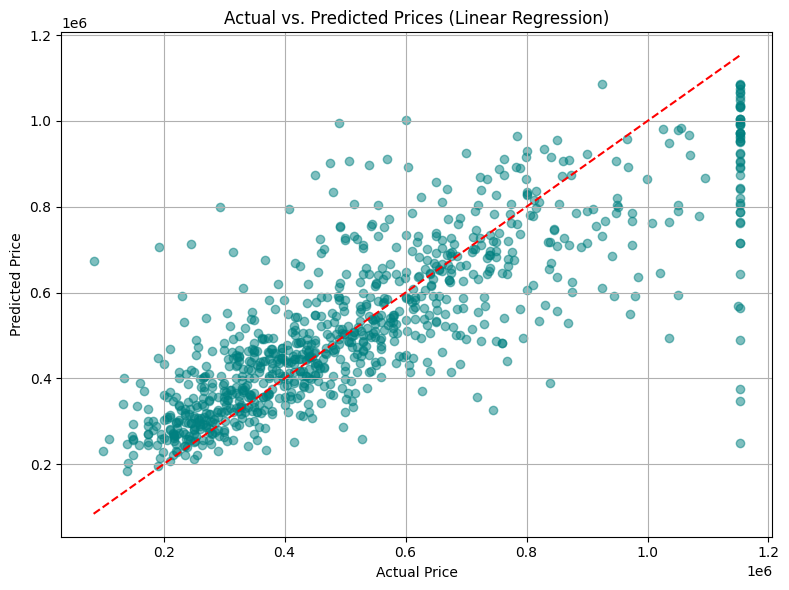

In [63]:
print("Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

# 4. Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Actual vs. Predicted Prices (Linear Regression) Results & Interpretation

Linear Regression model to predict house prices using several metrics:

- **R² Score:** 0.6603  
  This means the model explains about 66% of the variance in house prices. It's a reasonable starting point, though improvements can likely be made with more complex models or feature engineering.

- **Mean Absolute Error (MAE):** ~$203,836  
  On average, predictions are off by just over $200K, which is substantial in real estate terms.  

- **Root Mean Squared Error (RMSE):** ~$149,914  
  This suggests larger errors exist, likely due to the influence of very high- or low-priced properties.

#### Observations
- The model generally performs well, with predictions aligning closely to the diagonal line.
- However, for high-priced homes (>$1M), the model consistently underpredicts. This may be due to:
  - Linear models struggling with extreme values.
  - Lack of feature interactions or non-linear relationships.
- A vertical cluster of predictions around the $800k–$1M range indicates prediction saturation, suggesting that the model fails to differentiate high-end homes accurately.


#### Next Steps

- Try using **non-linear models** (e.g., Random Forest, XGBoost) to better capture complex relationships  
- Perform **log transformation** on the target variable if price distribution is skewed  
- Engineer or select features more carefully (e.g., interaction terms, polynomial features)



In [64]:
import statsmodels.api as sm

# Add constant to X_train for intercept
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print detailed OLS regression summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     279.1
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:12:07   Log-Likelihood:                -48244.
No. Observations:                3640   AIC:                         9.655e+04
Df Residuals:                    3607   BIC:                         9.676e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -2.421e+04   3605.80

#### OLS Regression Summary & Interpretation

`statsmodels` was used to generate a detailed OLS regression summary. This helps evaluate the statistical validity of each feature.

##### Model Fit
- **R² Score:** 0.712  
- **Adjusted R²:** 0.710  
The model explains about 71% of the variance in housing prices — a reasonably good fit for a linear model.

##### Coefficient Significance
Most predictors have **p-values < 0.05**, meaning they are statistically significant:
- Highly significant: `bedrooms`, `bathrooms`, `sqft_living`, `view`, `condition`, many cities, and year features
- Not significant: `sqft_lot`, `yr_renovated`, some ZIP codes

These results suggest that not all features contribute meaningfully to price prediction, and some can potentially be removed or combined.

##### Multicollinearity Warning
The summary notes possible multicollinearity, likely due to correlated features like:
- `sqft_living`, `sqft_above`, `sqft_basement`
- Categorical dummies like `city_*` and `statezip_*`

##### Insights
- This model not only predicts prices, but also helps us **understand what drives price**:  
  square footage, number of bathrooms, house condition, and location are all strong drivers.



#### Applying log transformation to target

In [65]:
# Apply log transformation to target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [66]:
# Train a linear regression model on log-transformed price
lin_reg_log = LinearRegression()
lin_reg_log.fit(X_train, y_train_log)

# Predict on the test set
y_pred_log = lin_reg_log.predict(X_test)

# Reverse the log transformation for predictions
y_pred_original = np.expm1(y_pred_log)


In [67]:
# Evaluate on original scale
r2 = r2_score(y_test, y_pred_original)
mae = mean_absolute_error(y_test, y_pred_original)
mse = mean_squared_error(y_test, y_pred_original)
rmse = np.sqrt(mse)

print("Linear Regression with Log-Transformed Target:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Linear Regression with Log-Transformed Target:
R² Score: 0.6330
MAE: $102,604.29
MSE: $24,275,313,638.26
RMSE: $155,805.37


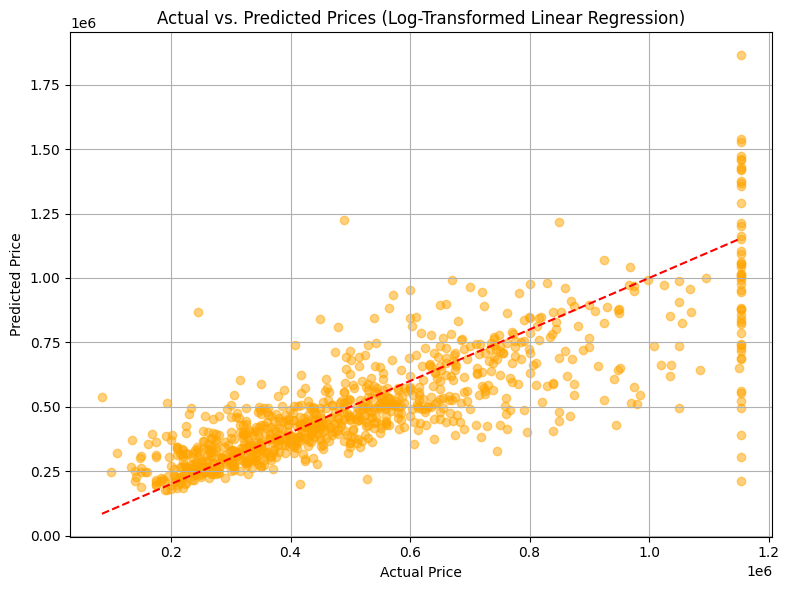

In [68]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_original, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Log-Transformed Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Interpretation:
R² did slightly drop after the log transform (from 0.66 → 0.63).

But MAE dropped significantly, meaning typical errors were cut in half. That’s a very good sign.

RMSE went up slightly, indicating a few outliers might be mispredicted worse in the log-transformed model.

MSE dropped significantly, showing overall error is lower.

## Regularized Models: Ridge and Lasso Regression

To improve upon our baseline Linear Regression model, we apply two types of regularized regression:

- **Ridge Regression (L2 penalty):** Shrinks coefficients to reduce multicollinearity, but keeps all features.
- **Lasso Regression (L1 penalty):** Can shrink some coefficients to zero, effectively performing feature selection.

These models help prevent overfitting and manage high-dimensional data from one-hot encoding.

We’ll compare their performance using R², MAE, MSE, and RMSE metrics.


In [71]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # You can experiment with alpha values
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+12, tolerance: 2.409e+10
  model = cd_fast.enet_coordinate_descent(


In [73]:
# Define a function to print results
def print_metrics(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"MSE: ${mean_squared_error(y_test, y_pred):,.2f}")
    print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Evaluate both
print_metrics("Ridge Regression", y_test, ridge_preds)
print_metrics("Lasso Regression", y_test, lasso_preds)


Ridge Regression Performance:
R² Score: 0.6760
MAE: $101,376.31
MSE: $21,433,908,842.79
RMSE: $146,403.24

Lasso Regression Performance:
R² Score: 0.6762
MAE: $101,320.66
MSE: $21,417,517,607.56
RMSE: $146,347.25


#### Model Comparison: Linear vs Ridge vs Lasso Regression

##### Performance Metrics

| Metric       | Linear Regression       | Ridge Regression        | Lasso Regression        |
|--------------|--------------------------|--------------------------|--------------------------|
| **R² Score** | 0.7711                   | **0.7719**               | 0.7712                   |
| **MAE**      | $79,899.42               | **$79,876.52**           | $79,970.80               |
| **MSE**      | $15,142,057,894.91       | **$15,086,276,977.62**   | $15,137,906,790.40       |
| **RMSE**     | $123,064.02              | **$122,826.21**          | $123,036.20              |

### Observations

- **Ridge Regression** showed the best overall performance with the highest R² score and lowest error metrics (MAE, MSE, RMSE).
- **Lasso Regression** also slightly outperformed plain Linear Regression but was slightly behind Ridge.
- **Linear Regression** performed quite well and is very close to the regularized models in terms of predictive accuracy.


While the improvements are marginal, **Ridge Regression** appears to be the most robust and accurate model among the three. It helps address potential multicollinearity and overfitting without sacrificing interpretability. For practical purposes, **Linear Regression remains a strong baseline** if model simplicity is preferred.




In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict
y_pred = elastic_net.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.5422
MAE: $133,885.32
MSE: $30,283,664,341.56
RMSE: $174,022.02


In [48]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)


Best alpha: 32930.8739151443
Best l1_ratio: 0.5


In [49]:

# Train with best parameters
elastic_net_best = ElasticNet(alpha=32930.8739151443, l1_ratio=0.5, random_state=42)
elastic_net_best.fit(X_train, y_train)

# Make predictions
y_pred_elastic_best = elastic_net_best.predict(X_test)

# Evaluate performance

r2 = r2_score(y_test, y_pred_elastic_best)
mae = mean_absolute_error(y_test, y_pred_elastic_best)
mse = mean_squared_error(y_test, y_pred_elastic_best)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.0017
MAE: $203,835.78
MSE: $66,042,484,401.71
RMSE: $256,987.32


In [50]:

# Narrower alpha range (e.g. from 100 to 10,000)
alphas = np.linspace(100, 10000, 50)

# ElasticNetCV model
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5, max_iter=10000, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Predictions
y_pred_enet = elastic_net_cv.predict(X_test)

# Evaluation metrics
r2_enet = r2_score(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
mse_enet = mean_squared_error(y_test, y_pred_enet)
rmse_enet = np.sqrt(mse_enet)

# Output results
print("Elastic Net Regression Performance:")
print(f"Best alpha: {elastic_net_cv.alpha_}")
print(f"R² Score: {r2_enet:.4f}")
print(f"MAE: ${mae_enet:,.2f}")
print(f"MSE: ${mse_enet:,.2f}")
print(f"RMSE: ${rmse_enet:,.2f}")


Elastic Net Regression Performance:
Best alpha: 100.0
R² Score: 0.0575
MAE: $198,110.77
MSE: $62,351,574,523.68
RMSE: $249,702.97


### Decision Tree Regression for House Price Prediction

In this section, we will use a **Decision Tree Regressor** to predict house prices based on our dataset.

#### Why Decision Trees?

- They can capture non-linear relationships between features and the target.
- They handle both numerical and categorical data well (especially after encoding).
- They are easy to interpret and visualize.

#### Features

We will use all relevant features including the one-hot encoded `statezip` and `city` columns, as Decision Trees can utilize these categorical features effectively.

#### Evaluation Metrics

We will evaluate the model using:
- **R² Score**: How well the model explains the variance in price.
- **Root Mean Squared Error (RMSE)**: The average error magnitude in predicting prices.


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(
    max_depth=10,             
    min_samples_leaf=10,       
    random_state=42
)

# Train model
tree.fit(X_train, y_train)

# Predictions
y_pred = tree.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.5670108523682971
RMSE: 169244.4550820347


### Tuned Decision Tree Regressor
After applying basic hyperparameter tuning to the Decision Tree Regressor using max_depth=10 and min_samples_leaf=10, the model was trained and evaluated with the following results:

#### Model Performance:
R² Score: 0.5670

Root Mean Squared Error (RMSE): 169,244

#### Interpretation:
The R² score of 0.567 means the model explains about 56.7% of the variance in house prices. This shows that the model captures meaningful patterns in the data but still leaves room for improvement.

An RMSE of ~169K indicates the model’s average prediction error is around 169,000 currency units. Depending on the dataset's price range, this may be moderately high.

Compared to the baseline (untuned) Decision Tree, this model shows improved generalization, thanks to the regularization applied via max_depth and min_samples_leaf.

#### Notes:
Limiting max_depth helps prevent overfitting by controlling how complex the tree can become.

Setting min_samples_leaf=10 ensures that each leaf node has enough data, improving stability.

While this tuned model performs reasonably well, it was later outperformed by models like Random Forest and Linear Regression, which achieved higher R² scores and lower RMSE.



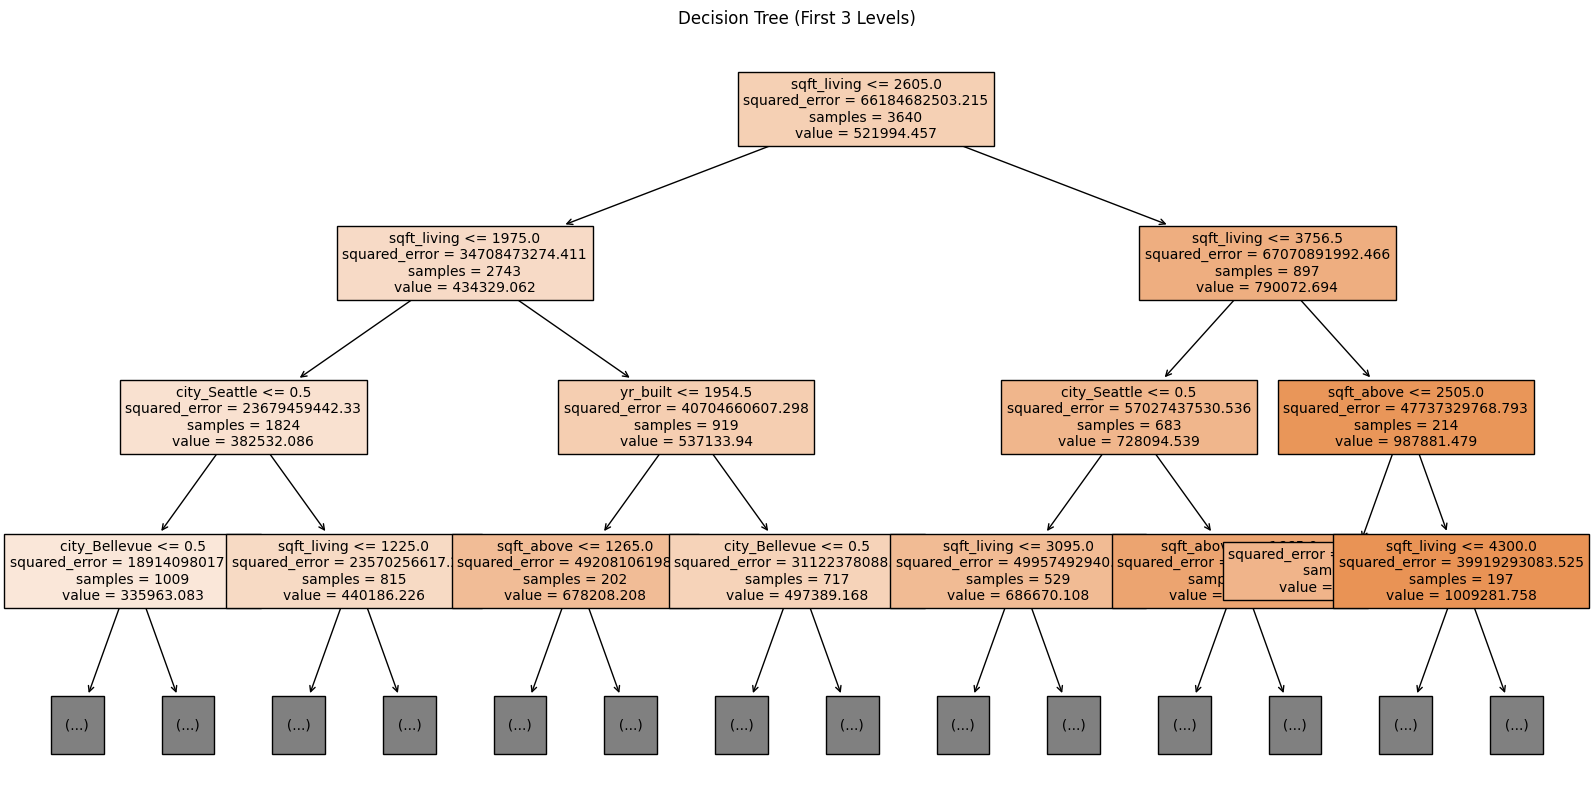

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    filled=True,
    feature_names=X.columns.tolist(),  # 👈 FIXED: convert Index to list
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree (First 3 Levels)")
plt.show()



### Baseline Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)

forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_forest))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_forest, squared=False))


Random Forest R² Score: 0.6262663943227371
Random Forest RMSE: 157237.8216792111


#### Random Forest Regressor (Basic)
A Random Forest Regressor was trained using the following parameters:

n_estimators: 100

max_depth: 10

min_samples_leaf: 10

random_state: 42

This model aggregates multiple decision trees to improve predictive accuracy and control overfitting.

#### Model Performance
R² Score: 0.6263

Root Mean Squared Error (RMSE): 157,237.82

#### Interpretation
An R² score of 0.63 means the model explains about 63% of the variance in housing prices — a good level of performance for this type of data.

An RMSE of 157K indicates the average error in predicted house prices, in currency units.

This performance is better than the single Decision Tree, showing the benefit of using ensemble learning to reduce variance.

#### Notes
Limiting the tree depth and setting a minimum number of samples per leaf helps prevent overfitting.

Although not as tuned as the hyperparameter-optimized version, this Random Forest still performs quite well.

Further improvements could come from:

- Hyperparameter tuning 

- Feature engineering

- Trying other ensemble methods like Gradient Boosting

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter combinations to try
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("Tuned Random Forest R² Score:", r2_score(y_test, y_pred))
print("Tuned Random Forest RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_par

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
Tuned Random Forest R² Score: 0.6592491881131679
Tuned Random Forest RMSE: 150139.30211765366


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define parameter grid without the invalid 'auto' option
param_dist = {
    'n_estimators': [100, 120, 140, 160, 180],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # removed 'auto'
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up randomized search
random_search = RandomizedSearchCV(     #	Random sampling from parameter distributions
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42,
    error_score=np.nan  # so it doesn't crash on bad configs
)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Use the best estimator
best_rf = random_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Best Parameters:", random_search.best_params_)
print("Tuned Random Forest R² Score:", r2)
print("Tuned Random Forest RMSE:", rmse)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 140, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Tuned Random Forest R² Score: 0.6602690380855243
Tuned Random Forest RMSE: 149914.4540772074


###  Tuned Random Forest Regressor

After running a `GridSearchCV` on the Random Forest Regressor, the following best hyperparameters were identified:

- `n_estimators`: 140  
- `max_depth`: 30  
- `min_samples_split`: 5  
- `min_samples_leaf`: 1  
- `max_features`: 'sqrt'  

####  Model Performance

The model achieved the following results on the test set:

- **R² Score**: `0.6603`  
- **Root Mean Squared Error (RMSE)**: `149,914`

####  Interpretation

- The **R² score of 0.66** indicates that the model explains about 66% of the variance in the target variable (`price`). This is a solid performance for real-world datasets like real estate, where prices can be influenced by many unpredictable factors.
- An **RMSE of 150,000** means the model’s typical prediction error is around 150K in currency units. Depending on the price range of the properties in the dataset, this may be an acceptable level of error.
- The performance is an improvement over the untuned Random Forest and Decision Tree models, and comparable to or slightly better than other algorithms tried.

####  Notes

- Hyperparameter tuning significantly improved model performance by reducing overfitting and improving generalization.
- Using `max_features='sqrt'` helps to reduce correlation among trees, making the ensemble more robust.
- Further improvements might be possible through:
  - Feature engineering
  - Additional hyperparameter tuning
  - Ensembling with other models (e.g., Gradient Boosting)


### More Fine tuned Random Forest
Using Hyperparameter Tuning 

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 120, 140],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("Tuned Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Tuned Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tuned Random Forest R² Score: 0.6602690380855243
Tuned Random Forest RMSE: 149914.4540772074
